# Business Understanding

## Problem Statement
Every year a high number of people lose their lives or suffer disabilities as a result of a road traffic accidents. Additionally, road traffic accidents cause considerable economic losses to individuals, their families, and the government.
As a result, this topic deserves serious attention. 
The aim of this project is, therefore, to use supervised learning on past traffic accident data to predict the severity of car accidents as a result of the complex interplay of parameters such as weather, road condition, speeding etc. and identify factors that increase the risk of severe accidents.

## Interest
Possible stakeholders for the above-described problem are federal, state and local government agencies that have a high interst in reducing casualties and economic losses.

# Data Understanding

## Data

The data is a cleaned version of the Seattle *Collisions* data set and can be obtained from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.

Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data

In [3]:
file = 'Data-Collisions.csv'
df = pd.read_csv(file, low_memory=False)

The data consists of 38 columns and 19473 entries.

In [4]:
print('The dataframe has', df.shape[1], 'columns and', df.shape[0], 'entries.')

The dataframe has 38 columns and 194673 entries.


There are integer, float and string type entries.

In [5]:
df.dtypes.to_frame().head(7)

,0
SEVERITYCODE,int64
X,float64
Y,float64
OBJECTID,int64
INCKEY,int64
COLDETKEY,int64
REPORTNO,object


70% of accidents belong to category *Property Damage Only Collision* while 30% belong to category *Injury Collision*

In [6]:
df['SEVERITYDESC'].value_counts().to_frame()/df.shape[0]

,SEVERITYDESC
Property Damage Only Collision,0.701099
Injury Collision,0.298901


Extract year, month, weekday and hour information from the datetime variable **INCDTTM**.

In [7]:
# Convert 'INCDTTM' to date type
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
# Extract month, weekday, hour information
df['MONTH']=df['INCDTTM'].dt.month
df['WEEKDAY']=df['INCDTTM'].dt.weekday
df['HOUR']=df['INCDTTM'].dt.hour
df['YEAR']=df['INCDTTM'].dt.year
# Drop
df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)

Number of collisions, where people were injuried, seems to be nearly constant since 2004. The number of accidents in 2020 is quite low even if we consider that the data dates only up to may 2020. This is probably a result of the decreased traffic due to COVID-19.

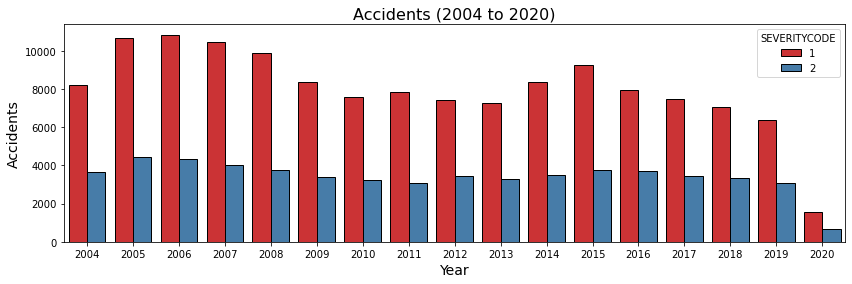

In [8]:
fig, ax = plt.subplots(figsize=(14,4))
sns.countplot(x='YEAR', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax)
plt.title('Accidents (2004 to 2020)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

There is a nearly constant number of incidents all year long, for both *injury* and *property damage only* type collisions.

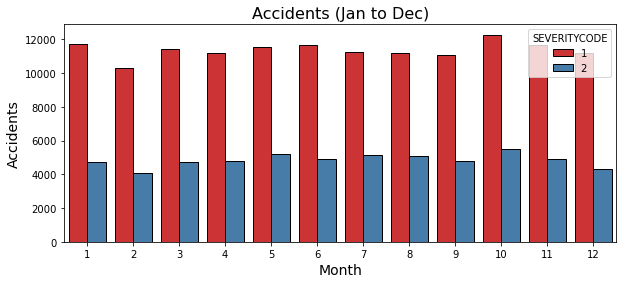

In [9]:
fig, ax = plt.subplots(figsize=(9.9,4))
sns.countplot(x='MONTH', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax)
plt.title('Accidents (Jan to Dec)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

There is an unusually high amount of incidents at 00:00AM. This seems rather inplausible and is probably the result of accidents with *unknown* time information being recorded as taking place at *00:00AM*.

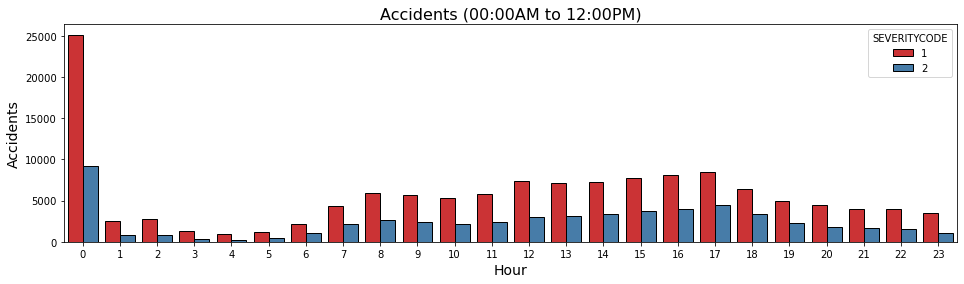

In [10]:
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(x='HOUR', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax)
plt.title('Accidents (00:00AM to 12:00PM)', fontsize=16)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

There are more incidents under influence during winter season and less in the fall. The number of incidents under influence where people get injured is nearly constant all year long, except in august and september.

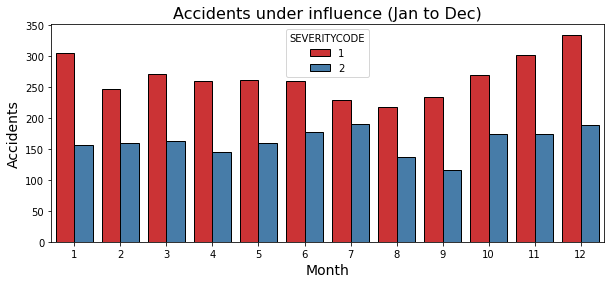

In [11]:
fig, ax = plt.subplots(figsize=(9.9,4))
sns.countplot(x='MONTH', hue='SEVERITYCODE', data=df[df['UNDERINFL']==('Y' or 1)], palette='Set1', ec='k', ax=ax)
plt.title('Accidents under influence (Jan to Dec)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

There is more accidents under influence on the weekend.

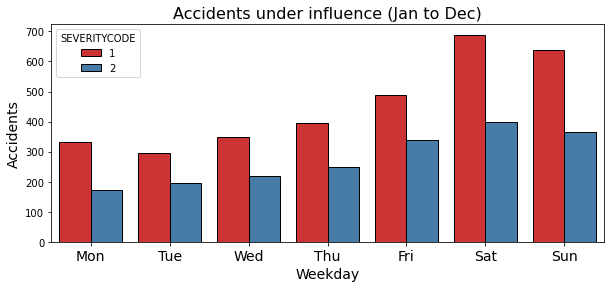

In [12]:
fig, ax = plt.subplots(figsize=(9.9,4))
sns.countplot(x='WEEKDAY', hue='SEVERITYCODE', data=df[df['UNDERINFL']==('Y' or 1)], palette='Set1', ec='k', ax=ax)
plt.title('Accidents under influence (Jan to Dec)', fontsize=16)
ax.set_xlabel('Weekday', fontsize=14)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

There are less incidents in total on sundays.

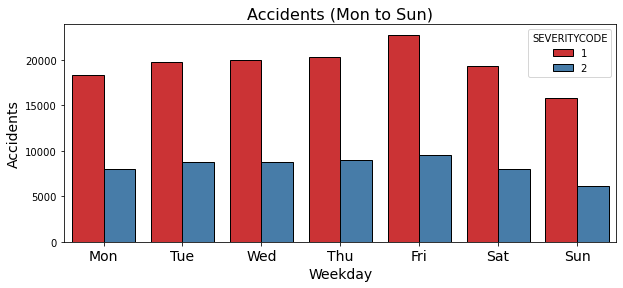

In [13]:
fig, ax = plt.subplots(figsize=(9.9,4))
sns.countplot(x='WEEKDAY', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax)
plt.title('Accidents (Mon to Sun)', fontsize=16)
ax.set_xlabel('Weekday', fontsize=14)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

The injury rate of incidents taking place in intersections is significantly higher than in blocks or alleys. Accidents in alleys are very rare.

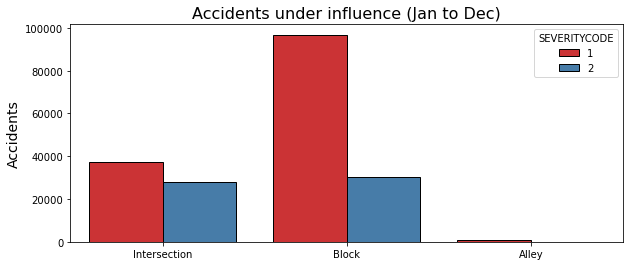

In [14]:
fig, ax = plt.subplots(figsize=(9.9,4))
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax)
plt.title('Accidents under influence (Jan to Dec)', fontsize=16)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Accidents', fontsize=14)
plt.show()

A higher percentage of collisions happening in the morning and early morning are due to inattention of drivers.

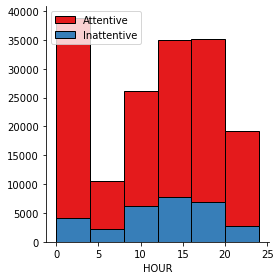

In [15]:
bins = [0, 4, 8, 12, 16, 20, 24]
g = sns.FacetGrid(df.replace({'INATTENTIONIND' : {np.nan: 'N'}}), hue='INATTENTIONIND', palette='Set1', height=4)
g.map(plt.hist, 'HOUR', bins=bins, ec="k")
plt.legend(['Attentive', 'Inattentive'])
plt.show()

Accidents involving vehicles coming from opposite directions, where one vehicle is making a left turn and the other is driving straigt, pose a high risk of injury.

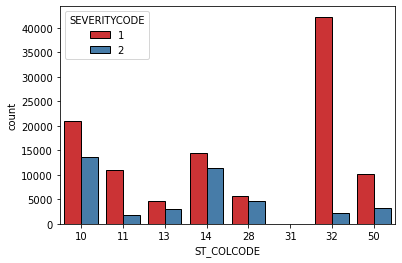

In [16]:
sns.countplot(x='ST_COLCODE', hue='SEVERITYCODE', palette='Set1', ec='k',
              data=df[['ST_COLCODE', 'SEVERITYCODE']][(df['ST_COLCODE']=='10') | (df['ST_COLCODE']=='11') | 
                                                      (df['ST_COLCODE']=='13') | (df['ST_COLCODE']=='14') | 
                                                      (df['ST_COLCODE']=='28') | (df['ST_COLCODE']=='31') |
                                                      (df['ST_COLCODE']=='32') | (df['ST_COLCODE']=='50')])
plt.show()

The **Location**s with the highest incident numbers are listed below. 

In [17]:
df['LOCATION'].value_counts().to_frame().head(10)

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,238
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,231
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,212
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,212


# Data Preparation

### Drop unnecessary columns

Unique ID columns are not predictors, hence drop:

In [18]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

Drop columns that are not specified in the metadata.

In [19]:
df.drop(['EXCEPTRSNCODE', 'REPORTNO', 'STATUS', 'SDOT_COLCODE'], axis=1, inplace=True)

Drop coordinates as the classifier is going to be used to identify general causes of accidents.

In [20]:
df.drop(['X', 'Y'], axis=1, inplace=True)

Drop columns having descriptions or content that are equivalent to other columns:

In [21]:
df.drop(['SEVERITYCODE.1', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'LOCATION', 'SDOTCOLNUM',
        ],
        axis=1, inplace=True)

### Now we clean up missing values etc.

#### Let's have a look at some of the categorical variables.

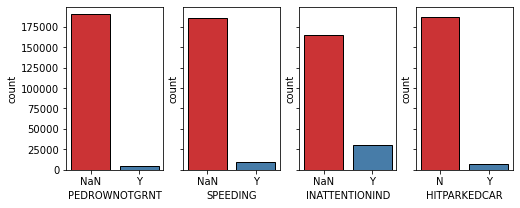

In [22]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(8,3))
sns.countplot(df['PEDROWNOTGRNT'].fillna('NaN'), palette='Set1', ec='k', ax=ax[0])
sns.countplot(df['SPEEDING'].fillna('NaN'), palette='Set1', ec='k', ax=ax[1])
sns.countplot(df['INATTENTIONIND'].fillna('NaN'), palette='Set1', ec='k', ax=ax[2])
sns.countplot(df['HITPARKEDCAR'].fillna('NaN'), palette='Set1', ec='k', ax=ax[3])
plt.show()

We replace missing values with *N* as we assume that no indication of influence means *not under influence*. The same goes for speeding. This could also be interpreted as an *Unknown* status. Modelingwise it would not make a difference.

In [23]:
df.replace({'PEDROWNOTGRNT' : {np.nan: 'N'}}, inplace=True)
df.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)
df.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)
df.replace({'HITPARKEDCAR' : {np.nan: 'N'}}, inplace=True)

#### We take a look at a few more categorical variables.

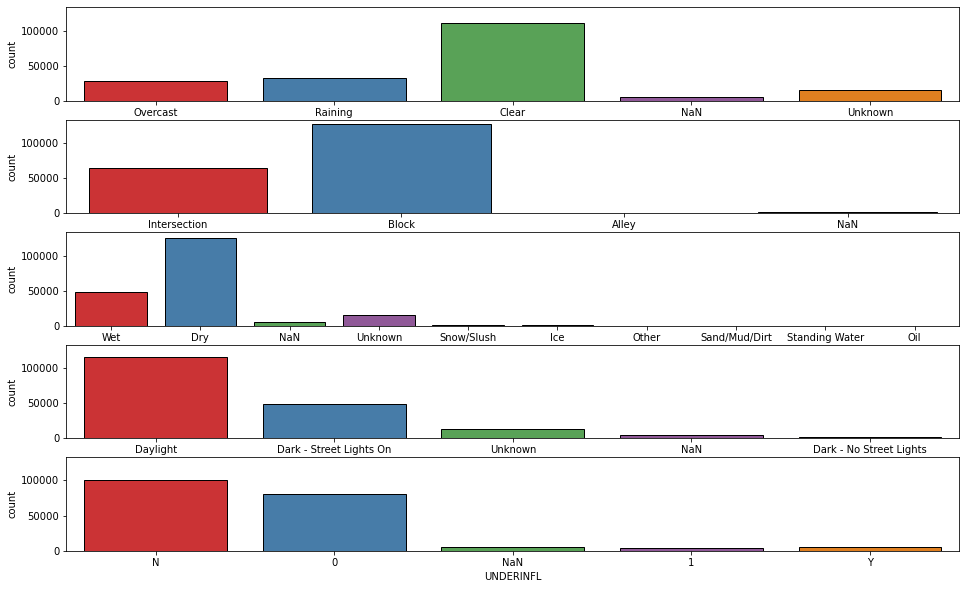

In [24]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharey=True, figsize=(16,10))
sns.countplot(df['WEATHER'].fillna('NaN'), palette='Set1', ec='k', ax=ax[0], 
              order=['Overcast', 'Raining', 'Clear', 'NaN', 'Unknown'])
sns.countplot(df['ADDRTYPE'].fillna('NaN'), palette='Set1', ec='k', ax=ax[1])
sns.countplot(df['ROADCOND'].fillna('NaN'), palette='Set1', ec='k', ax=ax[2])
sns.countplot(df['LIGHTCOND'].fillna('NaN'), palette='Set1', ec='k', ax=ax[3], 
              order=['Daylight', 'Dark - Street Lights On', 'Unknown', 'NaN', 'Dark - No Street Lights'])
sns.countplot(df['UNDERINFL'].fillna('NaN'), palette='Set1', ec='k', ax=ax[4])
plt.show()

We replace missing values with *Unknown*.

In [25]:
df.replace({'WEATHER' : {np.nan: 'Unknown'}}, inplace=True)
df.replace({'ADDRTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df.replace({'ROADCOND' : {np.nan: 'Unknown'}}, inplace=True)
df.replace({'LIGHTCOND' : {np.nan: 'Unknown', 'Dark - Unknown Lighting': 'Unknown'}}, inplace=True)
df.replace({'UNDERINFL' : {np.nan: 'Unknown'}}, inplace=True)
df.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

Summarize extremely rare cases for the **WEATHER** and **ROADCOND** parameter as *Other*.

In [26]:
df.replace({'WEATHER' : {'Partly Cloudy': 'Other', 'Severe Crosswind': 'Other', 'Blowing Sand/Dirt': 'Other',
                         'Sleet/Hail/Freezing Rain': 'Other', }}, inplace=True)
#'Fog/Smog/Smoke': 'Other'

In [27]:
df.replace({'ROADCOND' : {'Oil': 'Other', 'Sand/Mud/Dirt': 'Other', 'Standing Water': 'Other',}}, inplace=True)
#'Snow/Slush': 'Other', 'Ice': 'Other'

We unify the values in the **UNDERINFL** column. *0* --> *N* and *1* --> *Y*. 

In [28]:
df.replace({'UNDERINFL' : {'0': 'Y', '1': 'N'}}, inplace=True)

Combine entries.

In [29]:
df.replace({'LIGHTCOND' : {'Dark - No Street Lights': 'Dark - No Lights', 
                           'Dark - Street Lights Off': 'Dark - No Lights'}}, inplace=True)

Let's have a look at **ST_COLCODE**.

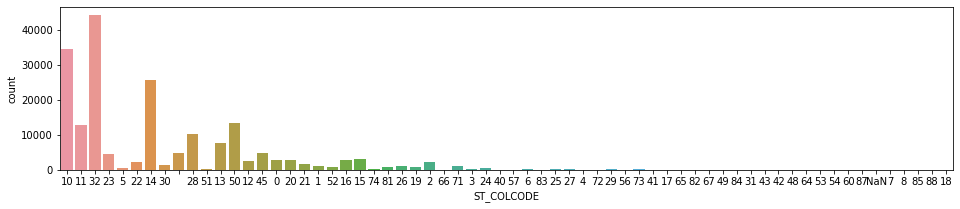

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,3))
sns.countplot(df['ST_COLCODE'].fillna('NaN'), ax=ax)
plt.show()

Replacing missing values and **Code 31** (*Not Stated* according to metadata) with *Unknown*.
And summarize rare cases as "Other".

In [31]:
df.replace({'ST_COLCODE' : {'4': 'Other', '7': 'Other', '8': 'Other', '17': 'Other', '18': 'Other', '40': 'Other', '41': 'Other', '42': 'Other', 
                            '43': 'Other', '48': 'Other', '49': 'Other', '53': 'Other', '54': 'Other', '56': 'Other', '57': 'Other',
                            '60': 'Other', '64': 'Other', '65': 'Other', '66': 'Other', '67': 'Other', '72': 'Other', 
                            '82': 'Other', '83': 'Other', '84': 'Other', '85': 'Other', '87': 'Other', '88': 'Other'}}, inplace=True)
df.replace({'ST_COLCODE' : {np.nan: '31', ' ': '31'}}, inplace=True)

#### Let's take a look at some of the continous, integer type, variables.

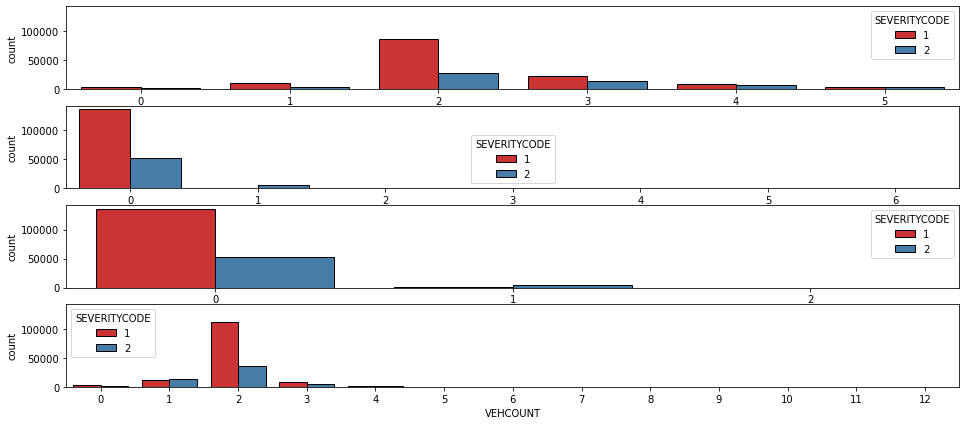

In [32]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(16,7))
sns.countplot(x='PERSONCOUNT', hue='SEVERITYCODE', data=df,  palette='Set1', ec='k', 
              order=[0, 1, 2, 3, 4, 5], ax=ax[0])
sns.countplot(x='PEDCOUNT', hue='SEVERITYCODE', data=df, palette='Set1', ec='k', ax=ax[1])
sns.countplot(x='PEDCYLCOUNT', hue='SEVERITYCODE', palette='Set1', ec='k', data=df, ax=ax[2])
sns.countplot(x='VEHCOUNT', hue='SEVERITYCODE', palette='Set1', ec='k', data=df, ax=ax[3])
plt.show()

We are going to categorize the **PERSONCOUNT** and **VEHCOUNT** variable into different classes. The personcount being zero seems inplausible. Espesically, if the **SEVERITICODE** indicates someone being injured. We, therefore, flag the zero values as *Unknown*.

In [33]:
df['PERSONCOUNT'] = df['PERSONCOUNT'].apply(lambda x: 'Unknown' if x==0 else ('1' if x==1 else (
    '2' if x==2 else ('3' if x==3 else '4_or_more'))))
df['VEHCOUNT'] = df['VEHCOUNT'].apply(lambda x: '0' if x==0 else ('1' if x==1 else (
    '2' if x==2 else '3_or_more')))

We are going to change the **PEDCOUNT** variable into a categorical variable **PEDINV**. The new variable describes if pedestrians were involved in the incident or not. The same action is performed for **PEDCYLCOUNT --> PEDCYLINV**.

In [34]:
df['PEDINV'] = df['PEDCOUNT'].apply(lambda x: 'N' if x==0 else 'Y')
df['PEDCYLINV'] = df['PEDCYLCOUNT'].apply(lambda x: 'N' if x==0 else 'Y')
df.drop(['PEDCOUNT', 'PEDCYLCOUNT'], axis=1, inplace=True)

At last we change the **SEVERITYCODE**s to zero (property damage only) and one (injury).

In [35]:
df.replace({'SEVERITYCODE' : {1: 0}}, inplace=True)
df.replace({'SEVERITYCODE' : {2: 1}}, inplace=True)

Save the preprocessed data to prevent reiterating the data preparation stage.

In [36]:
filename = "Collisions_preprocessed.csv"
df.to_csv(filename, index=False)

### One-hot encoding:

Load the preprocessed data.

In [37]:
filename = "Collisions_preprocessed.csv"
df = pd.read_csv(filename)

One-hot encode relevant features and delete resulting *Unknown* columns.

In [38]:
target='SEVERITYCODE'

In [39]:
one_hot_features = ['PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND', 'HITPARKEDCAR', 'WEATHER', 'JUNCTIONTYPE', #'ADDRTYPE',
                    'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'ST_COLCODE', 
                    'PERSONCOUNT', 'VEHCOUNT', 'PEDINV', 'PEDCYLINV'] #'WEEKDAY', 'MONTH', 'HOUR', 'YEAR'

dftemp = df[one_hot_features + ['SEVERITYCODE']]
for f in one_hot_features:
    dftemp = pd.concat([dftemp, pd.get_dummies(df[f].astype('category'), prefix=f ,dtype='int64')], axis=1)
    dftemp.drop([f], axis=1, inplace=True)

# Drop columns that contain information about unknown entities
df = dftemp
df.drop(df.columns[df.columns.str.contains('Unknown')], axis=1, inplace=True)
df.drop(['PEDROWNOTGRNT_N', 'SPEEDING_N', 'INATTENTIONIND_N', 'HITPARKEDCAR_N', 'UNDERINFL_N', 'PEDINV_N',
         'PEDCYLINV_N'], axis=1, inplace=True)

In [40]:
df.head()

,SEVERITYCODE,PEDROWNOTGRNT_Y,SPEEDING_Y,INATTENTIONIND_Y,HITPARKEDCAR_Y,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,...,PERSONCOUNT_1,PERSONCOUNT_2,PERSONCOUNT_3,PERSONCOUNT_4_or_more,VEHCOUNT_0,VEHCOUNT_1,VEHCOUNT_2,VEHCOUNT_3_or_more,PEDINV_Y,PEDCYLINV_Y
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [41]:
filename = "Collisions_preprocessed_encoded.csv"
df.to_csv(filename, index=False)

Resampling data for faster training during hyperparameter tuning and balancing:

In [42]:
sample_size = 10000
df = pd.concat([df[df[target]==1].sample(sample_size//2, random_state=4), 
                df[df[target]==0].sample(sample_size//2, random_state=4,)], axis=0)
df[target].value_counts()

1    5000
0    5000
Name: SEVERITYCODE, dtype: int64

# Modeling

Load modeling libraries

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
#!pip install xgboost
from xgboost import XGBClassifier

Splitting into training and test data:

In [44]:
y = df[[target]].values.ravel()
X = df.drop(target, axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# Important: Fit the test set on the training data. Otherwise, the test results will be biased as the model learns the mean 
# and standard deviation of the test data as well.
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_train).transform(X_test)

Logistic regression:

In [120]:
lr_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}

cv_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=4), lr_grid, cv=4, scoring='accuracy'
                    ).fit(X_train, y_train)

lr_accuracy_train = cv_lr.score(X_train, y_train)
print("Training Accuracy: %.1f%%"% (lr_accuracy_train*100))

lr_accuracy_test = cv_lr.score(X_test, y_test)
print("Testing Accuracy: %.1f%%"% (lr_accuracy_test*100))

print('Best Parameters: ', cv_lr.best_params_)

Training Accuracy: 69.8%
Testing Accuracy: 69.1%
Best Parameters:  {'C': 0.0001}


KNN: Extremely slow, even if we use the *ball tree* algorithm, which is faster for larger sample sizes and higher dimensions. 

In [89]:
knn_grid = {'n_neighbors': [10, 15, 20]}
knn_ss = 10000 # training takes too long for high values

cv_knn = GridSearchCV(KNeighborsClassifier(algorithm='ball_tree'), knn_grid, cv=4, scoring='accuracy'
                     ).fit(X_train[0:knn_ss], y_train[0:knn_ss])

knn_accuracy_train = cv_knn.score(X_train, y_train)
print("Training Accuracy: %.1f%%"% (knn_accuracy_train*100))

knn_accuracy_test = cv_knn.score(X_test, y_test)
print("Testing Accuracy: %.1f%%"% (knn_accuracy_test*100))

print('Best Parameters: ', cv_knn.best_params_)

Training Accuracy: 73.4%
Testing Accuracy: 63.1%
Best Parameters:  {'n_neighbors': 15}


In [127]:
dt_grid = {'max_depth': [4, 6, 8, 10, 15, 20], 'max_features': ['sqrt', 'log2']}
cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=4), dt_grid, cv=3, scoring='accuracy').fit(X_train, y_train)

tree_accuracy_train = cv_dt.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = cv_dt.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))
print('Best Parameters: ', cv_dt.best_params_)

Train Accuracy: 71.3%
Test Accuracy: 64.4%
Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt'}


In [91]:
xgb_grid = {'n_estimators': [50, 75, 100, 150, 500], 'learning_rate': [0.01, 0.05, 0.1]}

cv_xgb = GridSearchCV(XGBClassifier(), xgb_grid, cv=3, scoring='accuracy').fit(X_train, y_train)

xgb_accuracy_train = cv_xgb.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (xgb_accuracy_train*100))
xgb_accuracy_test = cv_xgb.score(X_test, y_test)
print("Test Accuracy: %.1f%%"% (xgb_accuracy_test*100))
print('Best Parameters: ', cv_xgb.best_params_)

Train Accuracy: 73.4%
Test Accuracy: 68.5%
Best Parameters:  {'learning_rate': 0.05, 'n_estimators': 150}


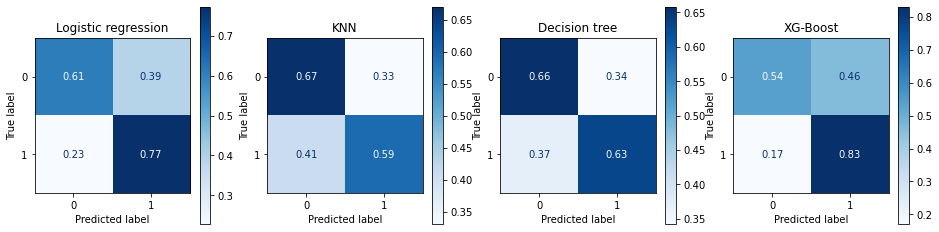

In [128]:
fig, ax = plt.subplots(ncols=4, figsize=(16,4))

plot_confusion_matrix(cv_lr, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues, normalize='true', ax=ax[0])
ax[0].set_title('Logistic regression')
plot_confusion_matrix(cv_knn, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues, normalize='true', ax=ax[1])
ax[1].set_title('KNN')
plot_confusion_matrix(cv_dt, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues, normalize='true', ax=ax[2])
ax[2].set_title('Decision tree')
plot_confusion_matrix(cv_xgb, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues, normalize='true', ax=ax[3])
ax[3].set_title('XG-Boost')
plt.show()

Let's take the tree boosting algorithm and train it on all available data (except some remaining test data).

In [83]:
filename = "Collisions_preprocessed_encoded.csv"
df = pd.read_csv(filename)
df[target].value_counts()

0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

Resample in order to balance the data.

In [84]:
sample_size = 136485
df = pd.concat([df[df[target]==0].sample(sample_size//2, random_state=4), 
                df[df[target]==1].sample(sample_size//2, random_state=4, replace=True)], axis=0)

y = df[[target]].values.ravel()
X = df.drop(target, axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# Important: Fit the test set on the training data. Otherwise, the test results will be biased as the model learns the mean 
# and standard deviation of the test data as well.
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_train).transform(X_test)

In [85]:
xgb_clf = XGBClassifier(n_estimators=150, learning_rate=0.05).fit(X_train, y_train)

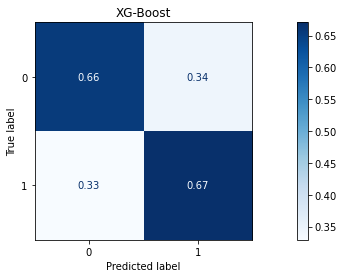

In [90]:
fig, ax = plt.subplots(ncols=1, figsize=(16,4))
plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Blues, normalize='true', ax=ax)
ax.set_title('XG-Boost')
plt.show()

In [91]:
xgb_accuracy_train = xgb_clf.score(X_train, y_train)
print("Train Accuracy - XG-Boost: %.1f%%"% (xgb_accuracy_train*100))
xgb_accuracy_test = xgb_clf.score(X_test,y_test)
print("Test Accuracy - XG-Boost: %.1f%%"% (xgb_accuracy_test*100))

Train Accuracy - XG-Boost: 72.3%
Test Accuracy - XG-Boost: 66.3%


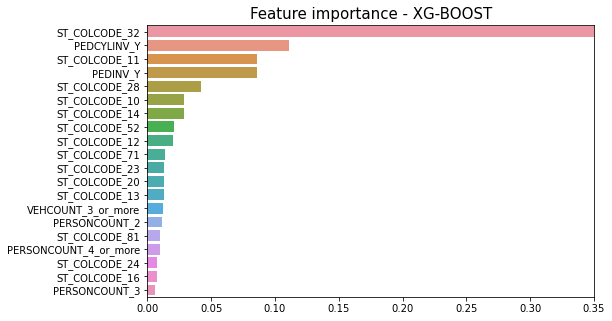

In [88]:
df_imp = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['Feature importance'], 
                           index=df.drop(target, axis=1).columns)

df_imp.iloc[:,0] = xgb_clf.feature_importances_

df_imp.sort_values(by='Feature importance', inplace=True, ascending=False)
df_imp = df_imp.head(20)

plt.figure(figsize=(8, 5))
sns.barplot(x='Feature importance', y=df_imp.index, data=df_imp)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlim([0,0.35])
plt.title('Feature importance - XG-BOOST', size=15)

plt.show()